# TASK-1  Simple Image Classification network (CNN+FCNN, FBPass):

## Given:
A Convolution neural network and a fully connected neural network is created to classify images into 2 classes. The final output is 0 or 1 corresponding to either of the two classes. The following table shows the neural networl architecture:

Layer |Output size | Kernel size |Stride | Padding | Activation function|
-----|-----|-----|-----|-----|-----|
Input|5x5x1|-|-|-|-|-|
Convolution|4x4x1|2x2|1|0|ReLU|
Max-pool|Data2|Data3|Data1|Data2|Data3|
Flatten|Data2|Data|Data1|Data2|Data3|
FCNN layer-1|Data2|Data3||Data1|Data2|Data3|
FCNN layer-2|Data2|Data3||Data1|Data2|Data3|

With the loss function being binary cross entropy loss. The network is set up to do binary classification, i.e., determine if an input image belongs to class 0 or 1. The input image has a single channel and the convolution has depth for making the computation slightly simpler. In total there are 18 trainable parameters ( in both the 5 convolutional layer and 13 in the fully-connected layer).With the loss function being binary cross entropy loss.

## Problem statement:
#### 1) Fill in the incomplete equations in the backpropagate fuction of the Our NeuralNetwork class

## SOLUTION

### Creating a CNN-FCNN to classify images to either class 0 or 1.

In [1]:
#Using functions from solved example 1

import numpy as np
import matplotlib.pyplot as plt


def visualize_image(X, label):
    # Plot "pixels" with numerical value and color map
    fig = plt.figure(figsize=(3, 3))
    ax = fig.add_subplot(1,1,1)
    ax.axis('off')
    ax.imshow(X, cmap="coolwarm")
    ax.title.set_text(label)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            ax.text(j, i, f"{X[i,j]:.4f}", color="black", fontsize="small", ha="center", va="center")



def convolution(X, F, b=0, s=1):
    w_out = (X.shape[0] - F.shape[0])//s + 1
    h_out = (X.shape[1] - F.shape[1])//s + 1
    z = np.zeros((h_out, w_out))
    for j in range(0, w_out, s):
        for i in range(0, h_out, s):
            z[i,j] = X[i:i+F.shape[1], j:j+F.shape[0]].flatten().dot(F.flatten()) + b
    return z

def max_pool(X, k, s):
    h_out = (X.shape[0] - k)//s + 1
    w_out = (X.shape[1] - k)//s + 1
    z = np.zeros((h_out, w_out))
    idx = []
    for j in range(0, h_out):
        for i in range(0, w_out):
            block = X[j*k:j*k+k, i*k:i*k+k]
            z[j,i] = np.max(block)
    # Forward pass
    # Let denote the input image assumed to be belonging to class :
    # We initialize the weights and bias in the convolutional layer (to some arbitrary values) and perform the forward pass through this layer:
            index = np.add(np.unravel_index(block.argmax(), block.shape), (j*k, i*k))
            idx.append(index) # Save indices of max values for backward pass!
    return z, idx

def ReLU(x):
    return abs(x) * (x > 0) # abs just makes -0.0 into 0.0 for easier reading
def d_ReLU(x):
    return 1 * (x > 0)
def sigmoid(x):
    y = np.exp(x)
    return y / (1 + y)
def d_sigmoid(x):
    y = sigmoid(x)
    return y * (1.0 - y)
def bce_loss(y, p):
    # Binary cross-entropy loss function
    return -(y * np.log10(p) + (1-y) * np.log10(1-p))
def d_bce_loss(y,p):
    # Derivative wrt. p
    return (1 - y) / (1 - p) - (y / p)

## Starting Forward pass

In [2]:
# Creating a random image of size 5x5
X= np.random.randint(3, size=(5,5))
y=1 # assuming its class 1

In [3]:
# Convolutional layer + ReLU activation function
F = np.array([[1,-1],[-1,1]]) # Kernel
b1 = 2.0 # Bias
z1 = convolution(X, F, b1, s=1) # Perform convolution
a1 = ReLU(z1) # Apply AF

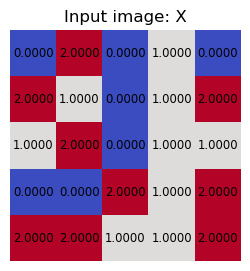

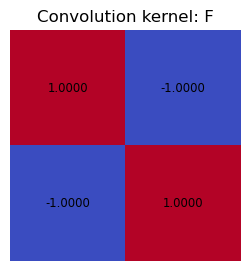

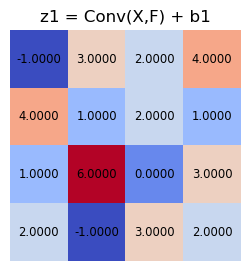

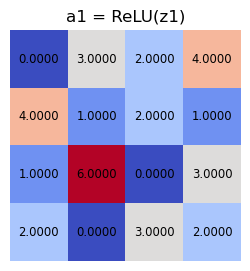

In [4]:
visualize_image(X, "Input image: X")
visualize_image(F, "Convolution kernel: F")
visualize_image(z1, "z1 = Conv(X,F) + b1")
visualize_image(a1, "a1 = ReLU(z1)")

#### We now apply max pooling and flatten the output of our feature extractor before passing it to the fully-connected layer:

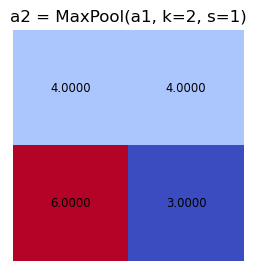

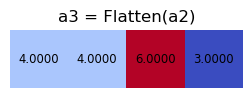

In [5]:
# MaxPool + Flatten
a2, max_idx = max_pool(a1, k=2, s=2)
a3 = a2.flatten()
visualize_image(a2, "a2 = MaxPool(a1, k=2, s=1)")
visualize_image(a3.reshape(1,4), "a3 = Flatten(a2)")

 ## We initialize the weights and bias of the fully-connected layer and perform the forward pass. We also compute the binary cross-entropy loss:

### Creating a FCNN (2x1) 
Inspired by (https://victorzhou.com/blog/intro-to-neural-networks/https://victorzhou.com/blog/intro-to-neural-networks/)
The FCNN below has 10 weights and 3 biases, so a total of 13 parameters.

[ 0.82544381 -0.85977334  0.24358691 -0.89976888  0.38930488  0.73632519
 -0.87020259 -1.5632225  -0.95889849  1.50922216]
[ 1.28497892 -1.03124672 -1.60015589]
Predicted output FCNN: 0.1134869209332628
BACKPROPOGATION BEGINS HERE!!
Loss: 0.945
Derivatives to be backpropogated to CNN [[ 0.17423758]
 [-0.18391598]
 [ 0.05351535]
 [-0.18750068]]


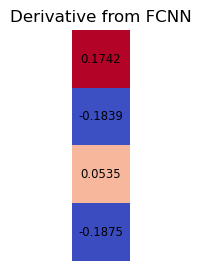

In [6]:
class OurNeuralNetwork:
    
    def __init__(self):
        # Weights
        self.w = np.random.normal(size=10)#(1-4 1st neuron 5-8 2nd neuron 9 10 last layer)
        print(self.w)

        # Biases
        self.b = np.random.normal(size=3)
        print(self.b)

    def feedforward(self, x):
        # x is a numpy array with 2 elements.
        h1 = sigmoid(self.w[0] * x[0] + self.w[1] * x[1]+ self.w[2] * x[2]+ self.w[3] * x[3] + self.b[0])
        h2 = sigmoid(self.w[4] * x[0] + self.w[5] * x[1]+ self.w[6] * x[2]+ self.w[7] * x[3] + self.b[1])
        o1 = sigmoid(self.w[8] * h1 + self.w[9] * h2 + self.b[2])
        return o1

    def backpropagate(self, data, y_true):

        # --- Do a feedforward (we'll need these values later)
        sum_h1 = self.w[0] * x[0] + self.w[1] * x[1]+ self.w[2] * x[2]+ self.w[3] * x[3] + self.b[0]
        h1 = sigmoid(sum_h1)

        sum_h2 = self.w[4] * x[0] + self.w[5] * x[1]+ self.w[6] * x[2]+ self.w[7] * x[3] + self.b[1]
        h2 = sigmoid(sum_h2)

        sum_o1 = self.w[8] * h1 + self.w[9] * h2 + self.b[2]
        o1 = sigmoid(sum_o1)
        y_pred = o1

        # --- Calculate partial derivatives.
        # --- Naming: d_L_d_w1 represents "partial L / partial w1"
        d_L_d_ypred = d_bce_loss(y_true,y_pred)
        # Neuron o1
        d_ypred_d_w9 = h1 * d_sigmoid(sum_o1)
        d_ypred_d_w10 = h2 * d_sigmoid(sum_o1)
        d_ypred_d_b3 = d_sigmoid(sum_o1)

        d_ypred_d_h1 = self.w[8] * d_sigmoid(sum_o1)
        d_ypred_d_h2 = self.w[9] * d_sigmoid(sum_o1)

        # Neuron h1
        d_h1_d_w1 = x[0] * d_sigmoid(sum_h1)
        d_h1_d_w2 = x[1] * d_sigmoid(sum_h1)
        d_h1_d_w3 = x[2] * d_sigmoid(sum_h1)
        d_h1_d_w4 = x[3] * d_sigmoid(sum_h1)
        d_h1_d_b1 = d_sigmoid(sum_h1)

        # Neuron h2
        d_h2_d_w5 = x[0] * d_sigmoid(sum_h2)
        d_h2_d_w6 = x[1] * d_sigmoid(sum_h2)
        d_h2_d_w7 = x[2] * d_sigmoid(sum_h2)
        d_h2_d_w8 = x[3] * d_sigmoid(sum_h2)
        d_h2_d_b2 = d_sigmoid(sum_h2)


        d_L_d_h1= d_L_d_ypred * d_ypred_d_h1 
        d_L_d_h2= d_L_d_ypred * d_ypred_d_h2

        d_h1_d_x1= self.w[0] * d_sigmoid(sum_h1)
        d_h1_d_x2= self.w[1] * d_sigmoid(sum_h1)
        d_h1_d_x3= self.w[2] * d_sigmoid(sum_h1)
        d_h1_d_x4= self.w[3] * d_sigmoid(sum_h1)

        d_h2_d_x1= self.w[4] * d_sigmoid(sum_h2)
        d_h2_d_x2= self.w[5] * d_sigmoid(sum_h2)
        d_h2_d_x3= self.w[6] * d_sigmoid(sum_h2)
        d_h2_d_x4= self.w[7] * d_sigmoid(sum_h2)

        ## To be backpropagated to CNN
        dL_dx1= d_h1_d_x1*d_L_d_h1 + d_h2_d_x1*d_L_d_h2
        dL_dx2= d_h1_d_x2*d_L_d_h1 + d_h2_d_x2*d_L_d_h2
        dL_dx3= d_h1_d_x3*d_L_d_h1 + d_h2_d_x3*d_L_d_h2
        dL_dx4= d_h1_d_x4*d_L_d_h1 + d_h2_d_x4*d_L_d_h2

        # --- Calculate total loss at the end of each epoch
        y_pred =self.feedforward(x)
        loss = bce_loss(y_true, y_pred)
        print("Loss: %.3f" % (loss))

        return np.array([dL_dx1,dL_dx2,dL_dx3,dL_dx4])

# Define dataset
x = a3
all_y_trues = np.array([1])
# Train our neural network!
network = OurNeuralNetwork()
print("Predicted output FCNN:",network.feedforward(x))
print("BACKPROPOGATION BEGINS HERE!!")
delta=network.backpropagate(x, all_y_trues)
print("Derivatives to be backpropogated to CNN",delta)
visualize_image(delta, "Derivative from FCNN")

## Backpropagating through the flattened layer

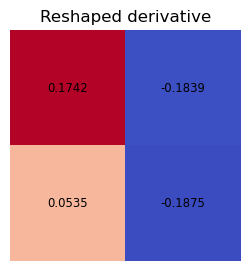

In [7]:
delta = delta.reshape(a2.shape)
visualize_image(delta, "Reshaped derivative")

We now backpropagate through the max pooling layer. Only the entries appearing as maximum values in the forward pass affects the output of the
max pooling layer (with a factor of ).

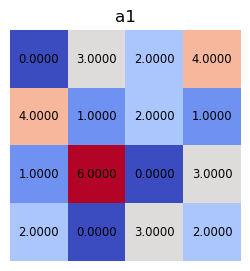

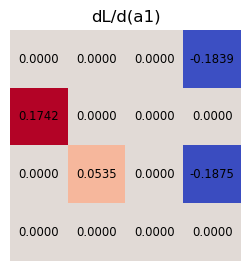

In [8]:
d = np.zeros(a1.shape)
for idx, grad in zip(max_idx, delta.flatten()):
    i, j = idx[0], idx[1]
    d[i,j] = grad
    delta = d
visualize_image(a1, "a1")
visualize_image(delta, "dL/d(a1)")

Next, we backpropagate through the ReLU activation function.

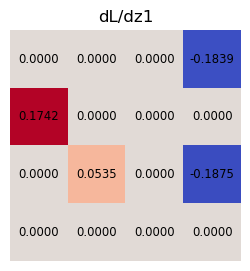

In [9]:
delta = d_ReLU(z1) * delta
visualize_image(delta, "dL/dz1")

## Final step of backpropagation
### Now finally backpropagating through the convolution layer. We have 5 parameters (4 in kernel and 1 bias) that affect the loss function here. 

In [10]:
grad_b1 = delta.sum() # dL/d(b1)
print("Derivative of loss function wrt b1")
print(f"dL / d(b1) = {grad_b1:.2f}")
#b1 = b1 - lr * grad_b1 # Update bias

Derivative of loss function wrt b1
dL / d(b1) = -0.14


Derivative of Loss function wrt to kernel F


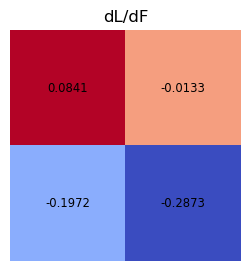

In [11]:
grad_F = convolution(X, delta)
print("Derivative of Loss function wrt to kernel F")
visualize_image(grad_F, "dL/dF")